# Graph Results of Algorithm
BS"D

In [154]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

## Load the Data

### Empty Grid Data

In [155]:
num_agents = [4, 8, 12, 16, 20]

success_rates_empty = {
    'Disjoint': [25, 25, 25, 24, 19],
    'Standard': [25, 25, 25, 22, 10],
    'MAC CBS': [25, 25, 25, 20, 5],
}

nodes_expanded_empty = {
    'Disjoint': [2.08, 4.72, 30.80, 210.90, 307.40],
    'Standard': [2.12, 5.00, 41.88, 1481.85, 4819.40],
    'MAC CBS': [2.12, 5.00, 39.28, 854.90, 1875.80],
}

nodes_expanded_empty

{'Disjoint': [2.08, 4.72, 30.8, 210.9, 307.4],
 'Standard': [2.12, 5.0, 41.88, 1481.85, 4819.4],
 'MAC CBS': [2.12, 5.0, 39.28, 854.9, 1875.8]}

### 10% Filled Grid Data

In [156]:
success_rates_filled = {
    'Disjoint': [25, 25, 25, 17, 2],
    'Standard': [25, 25, 25, 15, 0],
    'MAC CBS': [25, 25, 24, 12, 0],
}

nodes_expanded_filled = {
    'Disjoint': [3.24, 7.44, 129.29, 608.75],
    'Standard': [3.24, 7.56, 522.88, 4303.33],
    'MAC CBS': [3.24, 7.68, 350.38, 1730.50],
}

nodes_expanded_filled

{'Disjoint': [3.24, 7.44, 129.29, 608.75],
 'Standard': [3.24, 7.56, 522.88, 4303.33],
 'MAC CBS': [3.24, 7.68, 350.38, 1730.5]}

### Smooth Data
Convert the data to percentages.

In [157]:
def convert_to_percentages(lis, total):
    return [x / total for x in lis]

success_rates_empty_ratio = {k: convert_to_percentages(v, 25) for k, v in success_rates_empty.items()}
success_rates_filled_ratio = {k: convert_to_percentages(v, 25) for k, v in success_rates_filled.items()}
success_rates_filled_ratio

{'Disjoint': [1.0, 1.0, 1.0, 0.68, 0.08],
 'Standard': [1.0, 1.0, 1.0, 0.6, 0.0],
 'MAC CBS': [1.0, 1.0, 0.96, 0.48, 0.0]}

## Plot the Data
Plot the data as a line graph.

In [158]:
def plot_as_line_chart(data, title, filename, x_tics = None, y_axis_label = 'Success Rate'):
    '''
    Plots the given data as a line chart

    :param data: dictionary of data to plot
    :param title: title of the plot
    :param filename: filename to save the plot
    :param x_tics: labels for the x axis

    :return: None

    Will save the plot as a file
    '''
    fig, ax = plt.subplots(figsize=(3, 3))

    df = pd.DataFrame(data, index=x_tics)
    sns.set_style("whitegrid")
    sns.set_context("paper")
    ax = sns.lineplot(data=df, ax = ax)
    ax.set_title(title)
    ax.set_ylabel(y_axis_label)
    ax.set_xlabel('Number of Agents')

    # Set the x-axis labels
    ax.set_xticks(x_tics)

    # Assert that the output directory exists
    import os
    if not os.path.exists(os.path.dirname(filename)):
        os.makedirs(os.path.dirname(filename))

    ax.figure.savefig(filename)

def plot_nodes_expanded(data, title, filename, x_tics = None):
    '''
    Plots the given data as a line chart

    :param data: dictionary of data to plot
    :param title: title of the plot
    :param filename: filename to save the plot
    :param x_tics: labels for the x axis

    :return: None

    Will save the plot as a file
    '''
    df = pd.DataFrame(data, index=x_tics)
    sns.set_style("whitegrid")
    sns.set_context("paper")
    ax = sns.lineplot(data=df)
    ax.set_title(title)
    ax.set_ylabel('Nodes Expanded')
    ax.set_xlabel('Number of Agents')

    # Assert that the output directory exists
    import os
    if not os.path.exists(os.path.dirname(filename)):
        os.makedirs(os.path.dirname(filename))

    ax.figure.savefig(filename)

### Plot the Graphs

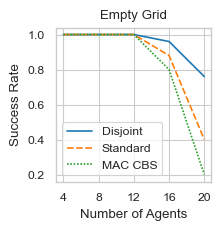

In [159]:
plot_as_line_chart(success_rates_empty_ratio, 'Empty Grid', 'plots/success_rate_empty.png', x_tics=num_agents)

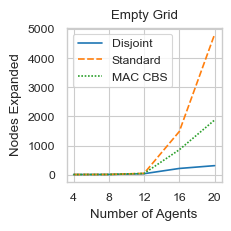

In [160]:
# Plot nodes expanded
plot_as_line_chart(nodes_expanded_empty, 'Empty Grid', 'plots/nodes_expanded_empty.png', y_axis_label = 'Nodes Expanded', x_tics=num_agents)

#### Plot 10% Filled Graphs

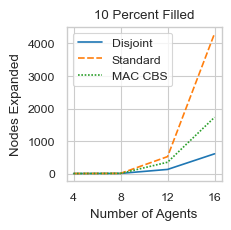

In [161]:
plot_as_line_chart(nodes_expanded_filled, '10 Percent Filled', 'plots/nodes_expanded_filled.png', y_axis_label = 'Nodes Expanded', x_tics=num_agents[:-1])


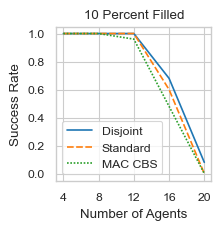

In [162]:
plot_as_line_chart(success_rates_filled_ratio, '10 Percent Filled', 'plots/success_rate_filled.png', x_tics=num_agents)